# Delivery Time Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data (Replace with your data source)
df = pd.read_csv('Final_dataset.csv')

# Feature Engineering
df['delivery_time'] = (pd.to_datetime(df['order_delivered_customer_date']) - 
                       pd.to_datetime(df['order_purchase_timestamp'])).dt.total_seconds()

# Features and Target
features = df[['shipping_limit_date', 'product_weight_g', 'product_length_cm', 
               'product_height_cm', 'product_width_cm', 'seller_state', 'customer_state']]
target = df['delivery_time']

# Convert `shipping_limit_date` to numerical feature
features['shipping_limit_date'] = pd.to_datetime(features['shipping_limit_date'])
features['days_to_shipping_limit'] = (features['shipping_limit_date'] - features['shipping_limit_date'].min()).dt.days
features.drop(columns=['shipping_limit_date'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
features['seller_state'] = label_encoder.fit_transform(features['seller_state'])
features['customer_state'] = label_encoder.fit_transform(features['customer_state'])

# Handle missing values
features.fillna(features.median(), inplace=True)
target.fillna(target.median(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Training with Random Forest
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluation
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
mae = mean_absolute_error(Y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', label='Ideal Fit')
plt.xlabel("Actual Delivery Time (seconds)")
plt.ylabel("Predicted Delivery Time (seconds)")
plt.title("Actual vs Predicted Delivery Time")
plt.legend()
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_22880\2584018854.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['shipping_limit_date'] = pd.to_datetime(features['shipping_limit_date'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22880\2584018854.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['days_to_shipping_limit'] = (features['shipping_limit_date'] - features['shipping_limit_date'].min()).dt.days
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22880\2584018854.py:25: SettingWithCopy

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22880\1842317101.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['shipping_limit_date'] = pd.to_datetime(features['shipping_limit_date'])
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22880\1842317101.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['days_to_shipping_limit'] = (features['shipping_limit_date'] - features['shipping_limit_date'].min()).dt.days
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22880\1842317101.py:22: SettingWithCopy

Linear Regression Results:
R² Score: 0.13
RMSE: 578557.35
MAE: 389712.36

SVM Results:
R² Score: -0.05
RMSE: 636582.07
MAE: 423847.11

Logistic Regression Results:
Accuracy: 0.49


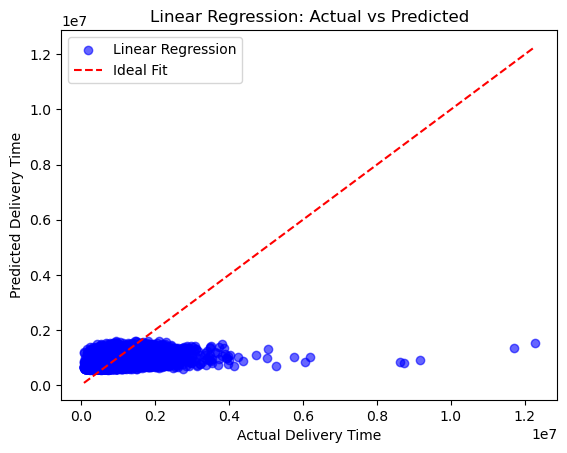

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Feature Engineering
df['delivery_time'] = (pd.to_datetime(df['order_delivered_customer_date']) - 
                       pd.to_datetime(df['order_purchase_timestamp'])).dt.total_seconds()

# Features and Target
features = df[['shipping_limit_date', 'product_weight_g', 'product_length_cm', 
               'product_height_cm', 'product_width_cm', 'seller_state', 'customer_state']]
target = df['delivery_time']

# Convert `shipping_limit_date` to datetime and then to numerical feature
features['shipping_limit_date'] = pd.to_datetime(features['shipping_limit_date'])
features['days_to_shipping_limit'] = (features['shipping_limit_date'] - features['shipping_limit_date'].min()).dt.days
features.drop(columns=['shipping_limit_date'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
features['seller_state'] = label_encoder.fit_transform(features['seller_state'])
features['customer_state'] = label_encoder.fit_transform(features['customer_state'])

# Fill missing values
features = features.fillna(features.median())
target = target.fillna(target.median())

# Scale features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test)

# Linear Regression Metrics
r2_linear = r2_score(Y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(Y_test, y_pred_linear))
mae_linear = mean_absolute_error(Y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"R² Score: {r2_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")

# Support Vector Machine Regression Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_test)

# SVM Metrics
r2_svm = r2_score(Y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(Y_test, y_pred_svm))
mae_svm = mean_absolute_error(Y_test, y_pred_svm)

print("\nSVM Results:")
print(f"R² Score: {r2_svm:.2f}")
print(f"RMSE: {rmse_svm:.2f}")
print(f"MAE: {mae_svm:.2f}")

# Logistic Regression (Optional for Classification)
# Binning the target variable into categories
target_class = pd.qcut(target, q=3, labels=[0, 1, 2])
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(features, target_class, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, Y_train_class)
y_pred_logistic = logistic_model.predict(X_test_class)

# Logistic Regression Metrics
accuracy = logistic_model.score(X_test_class, Y_test_class)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")

# Visualization for Linear Regression
plt.scatter(Y_test, y_pred_linear, alpha=0.6, color='blue', label='Linear Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Data Preparation (Assume df is already loaded)
# Review Sentiment Analysis
# Feature: 'review_comment_message', Target: Sentiment (Positive/Negative)

def preprocess_sentiment(df):
    df['sentiment'] = df['review_score'].apply(lambda x: 1 if x > 3 else 0)  # 1 = Positive, 0 = Negative
    df['review_comment_message'] = df['review_comment_message'].fillna('')
    return df

# Sales Prediction
# Features: 'price', 'freight_value', 'payment_value'; Target: 'sales'

def preprocess_sales(df):
    df['sales'] = df['price'] * df['payment_value']  # Example formula for sales
    features = df[['price', 'freight_value', 'payment_value']].fillna(0)
    target = df['sales']
    return features, target

# Order Cancellation Prediction
# Feature: 'order_status', Target: Binary Cancellation Status

def preprocess_cancellation(df):
    df['is_canceled'] = df['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)
    features = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
    target = df['is_canceled']
    features = features.fillna(features.median())
    return features, target

# Standardization Function
def standardize_data(features):
    scaler = StandardScaler()
    return scaler.fit_transform(features)

# 1. Review Sentiment Analysis
print("\n### Review Sentiment Analysis ###")
df = preprocess_sentiment(df)
X_sentiment = df['review_comment_message']
y_sentiment = df['sentiment']

# Splitting and Encoding Sentiment Data
label_encoder = LabelEncoder()
y_sentiment = label_encoder.fit_transform(y_sentiment)
X_train, X_test, Y_train, Y_test = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Logistic Regression for Sentiment Analysis
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train.values.reshape(-1, 1), Y_train)
y_pred = logistic_model.predict(X_test.values.reshape(-1, 1))

# Evaluation
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# 2. Sales Prediction
print("\n### Sales Prediction ###")
features_sales, target_sales = preprocess_sales(df)
features_sales = standardize_data(features_sales)

X_train, X_test, Y_train, Y_test = train_test_split(features_sales, target_sales, test_size=0.2, random_state=42)

# Linear Regression for Sales Prediction
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred = linear_model.predict(X_test)

# Metrics
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
mae = mean_absolute_error(Y_test, y_pred)

print("Linear Regression Results:")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualization
plt.scatter(Y_test, y_pred, alpha=0.6, color='blue', label='Linear Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.legend()
plt.show()

# 3. Order Cancellation Prediction
print("\n### Order Cancellation Prediction ###")
features_cancellation, target_cancellation = preprocess_cancellation(df)
features_cancellation = standardize_data(features_cancellation)

X_train, X_test, Y_train, Y_test = train_test_split(features_cancellation, target_cancellation, test_size=0.2, random_state=42)

# Support Vector Machine for Order Cancellation
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))



### Review Sentiment Analysis ###


ValueError: could not convert string to float: ''

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

def preprocess_sentiment(df):
    df['sentiment'] = df['review_score'].apply(lambda x: 1 if x > 3 else 0)
    df['review_comment_message'] = df['review_comment_message'].fillna('')
    return df

# Assume df is loaded
df = preprocess_sentiment(df)
X_sentiment = df['review_comment_message']
y_sentiment = df['sentiment']

# Encode and split
label_encoder = LabelEncoder()
y_sentiment = label_encoder.fit_transform(y_sentiment)
X_train, X_test, Y_train, Y_test = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Model training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train.values.reshape(-1, 1), Y_train)
y_pred = logistic_model.predict(X_test.values.reshape(-1, 1))

# Evaluation
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def preprocess_sales(df):
    df['sales'] = df['price'] * df['payment_value']
    features = df[['price', 'freight_value', 'payment_value']].fillna(0)
    target = df['sales']
    return features, target

# Assume df is loaded
features_sales, target_sales = preprocess_sales(df)
scaler = StandardScaler()
features_sales = scaler.fit_transform(features_sales)

X_train, X_test, Y_train, Y_test = train_test_split(features_sales, target_sales, test_size=0.2, random_state=42)

# Model training
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred = linear_model.predict(X_test)

# Metrics
print(f"R² Score: {r2_score(Y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(Y_test, y_pred):.2f}")

# Visualization
plt.scatter(Y_test, y_pred, alpha=0.6, color='blue', label='Linear Regression')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def preprocess_cancellation(df):
    df['is_canceled'] = df['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)
    features = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
    target = df['is_canceled']
    features = features.fillna(features.median())
    return features, target

# Assume df is loaded
features_cancellation, target_cancellation = preprocess_cancellation(df)
scaler = StandardScaler()
features_cancellation = scaler.fit_transform(features_cancellation)

X_train, X_test, Y_train, Y_test = train_test_split(features_cancellation, target_cancellation, test_size=0.2, random_state=42)

# Model training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)

# Evaluation
print(f"SVM Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))


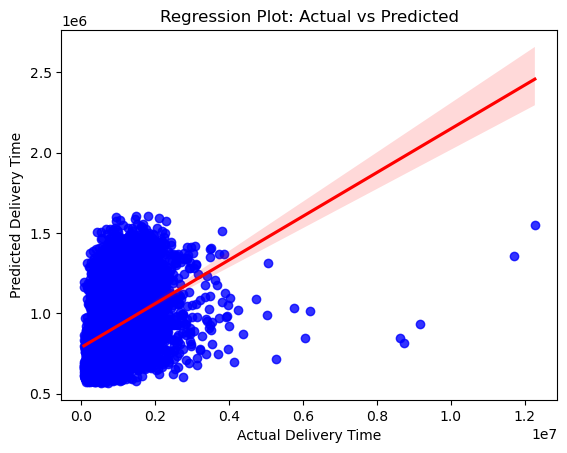

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predicted values from the model
y_pred = model.predict(X_test)

# Create a DataFrame for comparison
results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

# Regression plot
sns.regplot(x='Actual', y='Predicted', data=results_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Add labels and title
plt.title('Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')

plt.show()


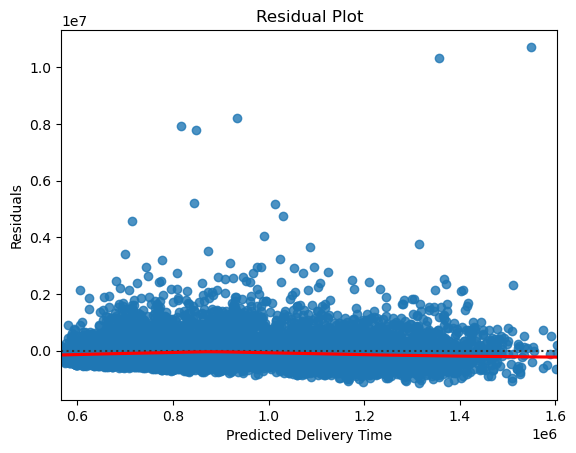

In [ ]:
residuals = Y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title('Residual Plot')
plt.xlabel('Predicted Delivery Time')
plt.ylabel('Residuals')
plt.show()
